In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
import common as cm
from Lab3.common import getErrorRate

# Part 1: Information Gain

Important note: this exercise uses Pandas (for data manipulation and analysis) and Graphviz (for graph-drawing) libraries. 

This exercise consists of 3 parts. Complete the first part to get a mark of 3.0, the first two parts to get 4.0, complete all assignments to get 5.0. 

1.1 ) There are 10 objects (data) characterized with 5 binary attributes:

In [2]:
attributeNames = ["attr 1", "attr 2", "attr 3", "attr 4", "attr 5"]

data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)

1.2) Each object is assigned to either a class "0" or "1". The assignments are as follows (cl):

In [3]:
data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

Hint: How one can read data (columns) in Pandas:

In [4]:
print(data["cl"])
print(list(data["cl"]))
print(set(data["cl"]))
print(data["attr 1"])

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: cl, dtype: int64
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
{0, 1}
0    1
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: attr 1, dtype: int64


Hint: How split data (Pandas DataFrame) base on column:

In [5]:
data[data['cl']==0]
# data[data['attr 5']==1]

,attr 1,attr 2,attr 3,attr 4,attr 5,cl
3,1,0,1,0,1,0
4,1,0,0,1,1,0
8,0,1,0,0,1,0
9,0,0,0,1,1,0


Hint: How take values from column (Pandas Series):

In [6]:
for id, row in data['cl'].items():
    print(id,row)

0 1
1 1
2 1
3 0
4 0
5 1
6 1
7 1
8 0
9 0


1.3 )  Finish the below function for calculating entropy. $H(CL) = - \sum_{y \in CL}p(y)log_2p(y)$ It should return a value of entropy for an input vector CL. Assume that $log_2(0)$ is equal to 0.

In [9]:
def getEntropy(cl):
    total = len(cl)
    values = set(cl)

    entropy = 0
    p = 0

    for value in values:
        p = 0
        for elem in cl:
            if elem == value:
                p += 1
        p = p/total
        if p>0:
            entropy -= p * math.log2(p)
        else:
            entropy += p * 0

    return entropy

1.4 ) Calculate the entropy for the CL vector  (the result should be 0.97095...):

In [10]:
print(getEntropy(data["cl"]))

0.9709505944546686


1.5) Finish the below function for calculating a conditional entropy: $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$. Assume that $log_2(0)$ is equal to 0 and if $p(x) = 0$, $\frac{p(x,y)}{p(x)}$ is equal to 0 as well.

In [11]:
def getConditionalEntropy(cl, attr):
    values = set(attr)
    conditional_entropy = 0

    for value in values:
        subset_cl = cl[attr == value]

        p = len(subset_cl)/len(attr)
        conditional_entropy += p * getEntropy(subset_cl)

    return conditional_entropy

1.6 ) Calculate conditional entropies for given attribiutes.

In [12]:

print(getConditionalEntropy(data["cl"], data["attr 1"])) ### the result should be 0.95097...
print(getConditionalEntropy(data["cl"], data["attr 5"])) ### the result should be 0.97095...

0.9509775004326937
0.9709505944546686


1.7 ) **Question: Which entropy is lesser and why?**

In [11]:
##Conditional entropy of dividing data with respect to attribute 1 is smaller because the results are more effective in regard to classifying the data.

1.8) Finish the below function for calculating information gain (use getEntropy() and getConditionalEntropy() functions):

In [13]:
def getInformationGain(cl, attr):
    return getEntropy(cl) - getConditionalEntropy(cl, attr)

In [14]:
print(getInformationGain(data["cl"], data["attr 1"]))
print(getInformationGain(data["cl"], data["attr 5"]))

0.01997309402197489
0.0


1.9) **Question: Which IG is lesser and why?**

In [14]:
##IG from attribute 5 is smaller because the resulting dataset, being homogenous, is not that helpful in further classifying the data. The resulting entropy for attribute 5 is the same as the initial entropy.

# Part 2: ID3 algorithm

Decision tree consists of decision nodes and leaves. Nodes split data while leaves classify objects. Consider the class "Node" provided below. It consists of 4 fields:
- attr - attribute ID (use the names in attributeNames vector)
- left - left branch, i.e., a reference to other node
- right - right branch, i.e., a reference to other node
- value - a decision. If node = None, then the node is not a leaf. If value is not None, then a node is considered a leaf. 

Method __call__ returns the decision if the node is a leaf (i.e., when value is not None). 
Otherwise, it calls either the left or the right branch of an input object, based on the attribute value (0 -> left children; 1 -> right children). In this way, we can traverse the decision tree in order to find the final decision.

3


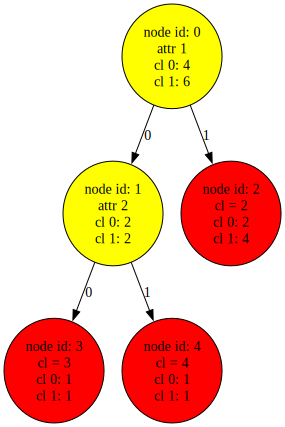

4
2
2


In [22]:
class Node:
    def __init__(self, attr, left, right, value):
        self.attr = attr
        self.left = left
        self.right = right
        self.value = value

    def __call__(self, obj):
        if self.value is None:
            if obj[self.attr] == 0:
                return self.left(obj)
            else:
                return self.right(obj)
        else:
            return self.value
        
### EXAMPLE
def example(obj):
    root = Node("attr 1", None, None, None) ###  IN ROOT SPLIT ON 1ST (0) ATTRIBUTE
    lChildren = Node("attr 2", None, None, None) ### IN ROOT's LEFT CHILDREN SPLIT ON 2ND (1) ATTRIBUTE
    rChildren = Node(None, None, None, 2) ### IN ROOT's RIGHT CHILDREN -> DECISION = 2
    root.left = lChildren
    root.right = rChildren
    llChildren = Node(None, None, None, 3) ### IN ROOT's LEFT-LEFT CHILDREN -> DECISION = 3
    lrChildren = Node(None, None, None, 4) ### IN ROOT's LEFT-RIGHT CHILDREN -> DECISION = 4
    lChildren.left = llChildren
    lChildren.right = lrChildren
    print(root(obj))
    return root
    
root = example(pd.Series([0,0],['attr 1','attr 2'])) ### ROOT : FIRST ATTRIBUTE = 0 SO WE GO TO LEFT CHILDREN.
### IT IS A LEAF WITH THE DECISION = 3
### THEN, IN THE CORRESPONDING CHILDREN, THE SECOND ATTRIBUTE = 0, SO WE GO TO LEFT-LEFT CHILDREN
cm.printGraph(root,data)

example({'attr 1':0,'attr 2':1})
example(pd.Series([1,0],['attr 1','attr 2']))
example({'attr 1':1,'attr 2':1})

2.1) Create an initial root. Set the value (decision) to 1. 

In [16]:
### TODO
root = Node(None, None, None, 1)

2.2) Use a getErrorRate method in common.py auxiliary file to calculate the error rate. The decision is made based on the majority rule. In case of tie, the method takes 0 as the default class.

In [17]:
print(getErrorRate(root, data))
## SHOULD BE 0.4

0.4


2.3) Use printGraph method (see the common.py file) to draw the decision tree and save it in a png file.

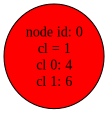

'decision_tree.png'

In [18]:
import importlib
from Lab3 import common

importlib.reload(common)
from Lab3.common import printGraph

### TODO
dot = printGraph(root, data)
dot.render("decision_tree", format="png", cleanup=True)

2.4) Calculate information gain for all attribiutes.

In [19]:
def printInformationGain(data):
    for attribute_name in attributeNames:
        print(f"{attribute_name}:",  getInformationGain(data["cl"], data[attribute_name]))
        
printInformationGain(data)

attr 1: 0.01997309402197489
attr 2: 0.0464393446710154
attr 3: 0.12451124978365313
attr 4: 0.0912774462416801
attr 5: 0.0


2.5) Choose the best attribute to split the data (HINT, it should be the third attribute :)). Construct two new nodes: one for $x_i$ = 0 decision and the second for $x_i$ = 1; connect them with the root (left and right branch). Remember to update the root. 

In [23]:
root = Node("attr 3", Node(None, None, None, 1), Node(None, None, None, 1), None)





2.6) Print the graph and calculate the error rate. What happened with the error rate?

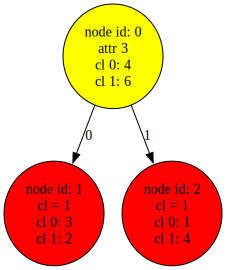

Error with empty children: 0.4


In [24]:
cm.printGraph(root, data)
print("Error with empty children:", getErrorRate(root, data))


2.7) Split the 'data' (table) based on the selected attribiute, i.e., create two new tables.

In [25]:
left_data = data[data["attr 3"] == 0]
right_data = data[data["attr 3"] == 1]

2.8) Let us start with the left node. Firstly, calculate information gain for this node.

In [26]:
printInformationGain(left_data)

attr 1: 0.4199730940219749
attr 2: 0.01997309402197489
attr 3: 0.0
attr 4: 0.01997309402197489
attr 5: 0.0


2.9) Choose the best attribute to split the data and then update the decision tree.

In [27]:
root = Node("attr 3", None, None, None)
lChildren = Node("attr 1", None, None, None)
root.left = lChildren
lChildren.left = Node(None, None, None, 0)
lChildren.right = Node(None, None, None, 1)
root.right = Node(None, None, None, 1)

2.10) Print the graph and calculate the error rate (HINT: should be 0.2 :). What happened with the error rate?

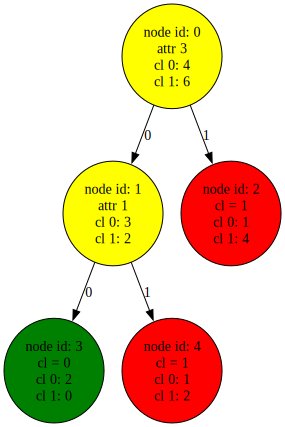

Error after left split: 0.19999999999999996


In [28]:
cm.printGraph(root, data)
print("Error after left split:", getErrorRate(root, data))

2.11) Split data (remember that we split left_data, not data).

In [29]:
leftLeft_data = left_data[left_data["attr 1"] == 0]
leftRight_data = left_data[left_data["attr 1"] == 1]


2.12) Repeat the whole process for the right node.

In [30]:
# TODO compute the information gain
printInformationGain(right_data)

attr 1: 0.17095059445466865
attr 2: 0.17095059445466865
attr 3: 0.0
attr 4: 0.7219280948873623
attr 5: 0.0


In [33]:
# TODO update the decision tree
rChildren = root.right
rChildren = Node("attr 4", None, None, None)
root.right = rChildren
rChildren.left = Node(None, None, None, 0)
rChildren.right = Node(None, None, None, 1)

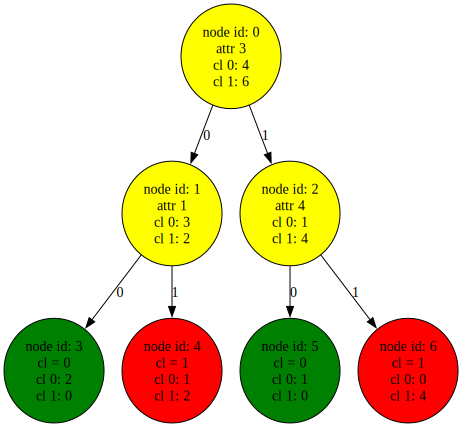

Error after right split: 0.09999999999999998


In [34]:
# TODO print the decision tree and calculate the error rate (HINT, should be 0.1:) )
cm.printGraph(root, data)
print("Error after right split:", getErrorRate(root, data))


In [35]:
# TODO split the data (right_data)
rightLeft_data = right_data[right_data["attr 4"] == 0]
rightRight_data = right_data[right_data["attr 4"] == 1]

2.13) Let's consider left-left node. Calculate information gain for it.

In [36]:
# TODO
printInformationGain(leftLeft_data)


attr 1: 0.0
attr 2: 0.0
attr 3: 0.0
attr 4: 0.0
attr 5: 0.0


2.14) Will adding a new node to the tree improve its effectiveness? Why? Why not?

In [ ]:
#Adding a new node does not improve effectiveness because the data in this node already belongs mostly to a single class.
#Further splitting does not significantly reduce entropy.

2.15) Calculate information gain for the left-right node.

In [37]:
printInformationGain(leftRight_data)

attr 1: 0.0
attr 2: 0.2516291673878229
attr 3: 0.0
attr 4: 0.2516291673878229
attr 5: 0.0


In [40]:
### Select the attribute and update the tree
lRight = lChildren.right
lRight = Node("attr 2", None, None, None)
lChildren.right = lRight
lRight.left = Node(None, None, None, 1)
lRight.right = Node(None, None, None, 1)

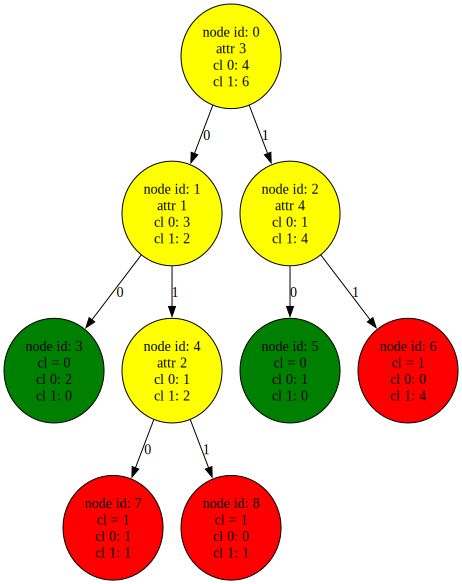

Error after left-right split: 0.09999999999999998


In [41]:
### Print the decision tree and compute the error rate
cm.printGraph(root, data)
print("Error after left-right split:", getErrorRate(root, data))

2.16) What happened with the error rate? Is it necessary to keep these two newly added leaves?

In [ ]:
#The error rate does not change.
#adding these nodes is unnecessary and may lead to overfitting.

2.17) Finish creating the right side of the tree

In [ ]:
### TODO
#The final decision tree achieves an error rate of 0.1.
#Further splits do not improve classification accuracy.

# Part 3: automated construction of decision trees

3.1 Complete the following function for automated construct of decision trees, so that it returns a decision tree for the given data and attribute list. Note that this is a recusive method, i.e., calls itself.

In [42]:
max_depth = 0

def createTree(data, attributeNames, depth=0):
    data = data.reset_index(drop=True)
    if len(set(data["cl"])) == 1:
        return Node(None, None, None, data["cl"].iloc[0])
    if len(attributeNames) == 0 or depth >= max_depth:
        majority_class = data["cl"].mode()[0]
        return Node(None, None, None, majority_class)
    best_attr = max(attributeNames, key=lambda a: getInformationGain(data["cl"], data[a]))
    root = Node(best_attr, None, None, None)
    left_data = data[data[best_attr] == 0]
    right_data = data[data[best_attr] == 1]
    if left_data.empty:
        root.left = Node(None, None, None, data["cl"].mode()[0])
    else:
        root.left = createTree(left_data, [a for a in attributeNames if a != best_attr], depth + 1)

    if right_data.empty:
        root.right = Node(None, None, None, data["cl"].mode()[0])
    else:
        root.right = createTree(right_data, [a for a in attributeNames if a != best_attr], depth + 1)

    return root



3.2) Build a decision tree for a training dataset in the common.py auxiliary file, for diffrent values of max_depth.  Calculate & compare the error rates for training and validation datasets.

In [43]:
max_depth = 10

In [44]:
# Training dataset
train_attributeNames, train_data = cm.getTrainingDataSet()
train_attributeNames = list(train_data.columns.drop("cl"))
train_root = createTree(train_data, train_attributeNames)
print("Training error:", getErrorRate(train_root, train_data))

Training error: 0.19999999999999996


In [45]:
# Validation dataset
valid_attributeNames, valid_data = cm.getValidationDataSet()
valid_attributeNames = list(valid_data.columns.drop("cl"))
valid_root = createTree(valid_data, valid_attributeNames)
print("Validation error:", getErrorRate(valid_root, valid_data))

Validation error: 0.0


3.3) Consider only the training data set and answer the following questions:
* What is the miximum depth of the tree (consider only the training data set)?
* The tree building process should stop when there is no improvement in error rate (why?). Check for which value of "max_dept" there is no improvement in error rate. 

In [46]:
for i in range(10):
    max_depth = i
    ### TODO
    train_root = createTree(train_data, train_attributeNames)
    error = getErrorRate(train_root, train_data)
    print(f"Depth={i}, Training error={error}")

Depth=0, Training error=0.4
Depth=1, Training error=0.35
Depth=2, Training error=0.30000000000000004
Depth=3, Training error=0.25
Depth=4, Training error=0.25
Depth=5, Training error=0.19999999999999996
Depth=6, Training error=0.19999999999999996
Depth=7, Training error=0.19999999999999996
Depth=8, Training error=0.19999999999999996
Depth=9, Training error=0.19999999999999996


In [ ]:
#The depth is equal to the number of attributes in the set.
#In our case, it's 5 because there's nothing further to split—all the attributes have already been used.
#We need to stop if the error doesn't decrease.
#Because new splits don't provide any information gain.
#The tree becomes more complex, but the accuracy doesn't improve.
#This leads to overfitting, meaning there's no point in continuing.
#Usually, after a depth of 3–4, the error stops decreasing.
#The loop shows that, starting at this value, the quality stabilizes, and further increases in depth are of no benefit.